<a href="https://colab.research.google.com/github/ishanRepo/Data-Analysis/blob/master/Assign2FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(x_train))
print(len(x_test))
print(x_train.shape)
print(x_test.shape)

60000
10000
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

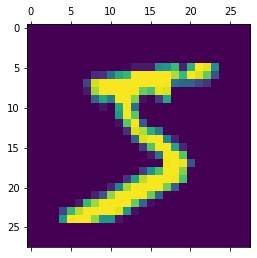

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train = x_train/255.0
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6363 - accuracy: 0.8414 - val_loss: 0.3539 - val_accuracy: 0.9027
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3348 - accuracy: 0.9069 - val_loss: 0.2910 - val_accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2851 - accuracy: 0.9198 - val_loss: 0.2544 - val_accuracy: 0.9304
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2544 - accuracy: 0.9283 - val_loss: 0.2335 - val_accuracy: 0.9353
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2318 - accuracy: 0.9348 - val_loss: 0.2152 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2137 - accuracy: 0.9399 - val_loss: 0.1992 - val_accuracy: 0.9434
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1984 - accuracy: 0.9444 - val_loss: 0.1860 - val_accuracy:

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuray=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1610 - accuracy: 0.9538
Loss=0.161
Accuray=0.954


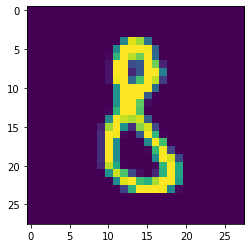

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [ ]:
predicted_value = model.predict(x_test)
print("Image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Image is= 8


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

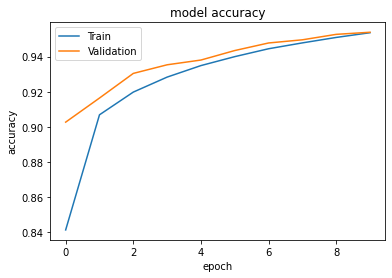

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

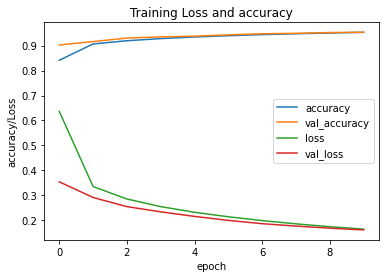

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()